#  <font color=green>Credit Card Fraud Detection Project</font>



## Library Imports 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


## Data Importing

In [ ]:
data = pd.read_csv('/content/fraud.csv')

##  PART 1 : EDA 

### Column and Row details 

In [ ]:
# column names 
print(data.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438027 entries, 0 to 438026
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             438027 non-null  int64  
 1   trans_date_trans_time  438027 non-null  object 
 2   cc_num                 438027 non-null  int64  
 3   merchant               438027 non-null  object 
 4   category               438027 non-null  object 
 5   amt                    438027 non-null  float64
 6   first                  438027 non-null  object 
 7   last                   438027 non-null  object 
 8   gender                 438027 non-null  object 
 9   street                 438027 non-null  object 
 10  city                   438027 non-null  object 
 11  state                  438027 non-null  object 
 12  zip                    438027 non-null  int64  
 13  lat                    438027 non-null  float64
 14  long                   438027 non-nu

In [ ]:
# data dimensions 
data.shape

(438027, 23)

In [ ]:
# summary stats on columns 
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,438027.000000,4.380270e+05,438027.000000,438027.000000,438027.000000,438027.000000,4.380270e+05,4.380270e+05,438027.000000,438027.000000,438027.000000
mean,219013.000000,4.196696e+17,69.506341,48813.406696,38.541217,-90.216715,8.823665e+04,1.378870e+09,38.540674,-90.216688,0.004438
std,126447.647519,1.312533e+18,149.138647,26853.387633,5.059488,13.717080,3.000514e+05,4.331783e+06,5.094153,13.729860,0.066471
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,109506.500000,1.800429e+14,9.640000,26237.000000,34.668900,-96.798000,7.410000e+02,1.375051e+09,34.756095,-96.884859,0.000000
50%,219013.000000,3.521417e+15,47.380000,48174.000000,39.371600,-87.476900,2.408000e+03,1.378540e+09,39.377368,-87.437281,0.000000
75%,328519.500000,4.642255e+15,83.120000,72011.000000,41.894800,-80.175200,1.968500e+04,1.382701e+09,41.951621,-80.252344,0.000000
max,438026.000000,4.992346e+18,19364.910000,99921.000000,65.689900,-67.950300,2.906700e+06,1.386327e+09,66.679297,-66.952026,1.000000


In [ ]:
# capture numeric columns and non numeric columns list 
num_vars = data.columns[data.dtypes != object]
cat_vars = data.columns[data.dtypes == object]

In [ ]:
# print numeric columns 
print(num_vars)

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [ ]:
# print categorical columns 
print(cat_vars)

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')


In [ ]:
# count of  nulls in columns 
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
# function to get unique count per column in a data frame 
def count_unique_values(df):
    
    total = df.count()
    temp = pd.DataFrame(total)
    temp.columns = ['Total']            # Count total number of non-null values
    
    uniques = []
    for col in df.columns:
        unique = df[col].nunique()    # Get unique values for each column
        uniques.append(unique)
    temp['Uniques'] = uniques
    
    return(np.transpose(temp))

In [ ]:
# get count of unique values for dataframe 
count_unique_values(data)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
Total,438027,438027,438027,438027,438027,438027,438027,438027,438027,438027,...,438027,438027,438027,438027,438027,438027,438027,438027,438027,438027
Uniques,438027,430529,923,693,14,34344,341,471,2,923,...,909,909,834,478,909,438027,430529,432234,435552,2


### Distributions and Correlations 


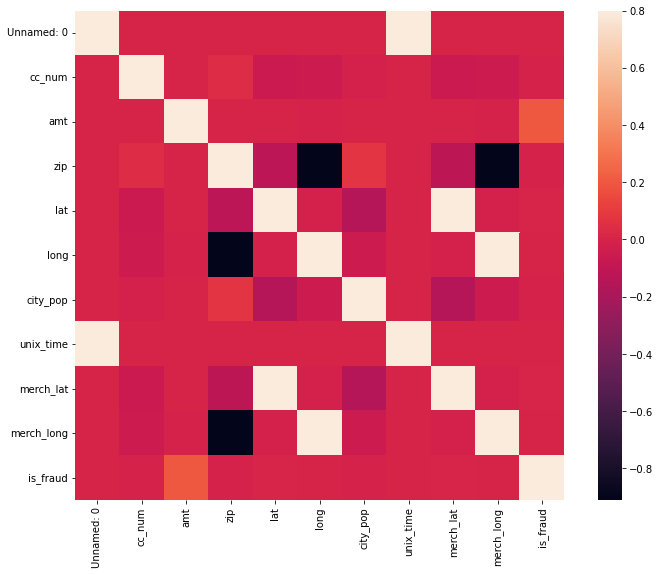

In [ ]:

# correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

 Plot shows mostly that the columns are not correlated 

In [ ]:
# Histograms of each variable :  0.2 random sample of rows selected 
# ---------------------------------------------------------------------

# random_state helps assure that you always get the same output when you split the data
# this helps create reproducible results and it does not actually matter what the number is
# frac is percentage of the data that will be returned
data_part = data.sample(frac = 0.6, random_state = 1)
print(data_part.shape)

(262816, 23)


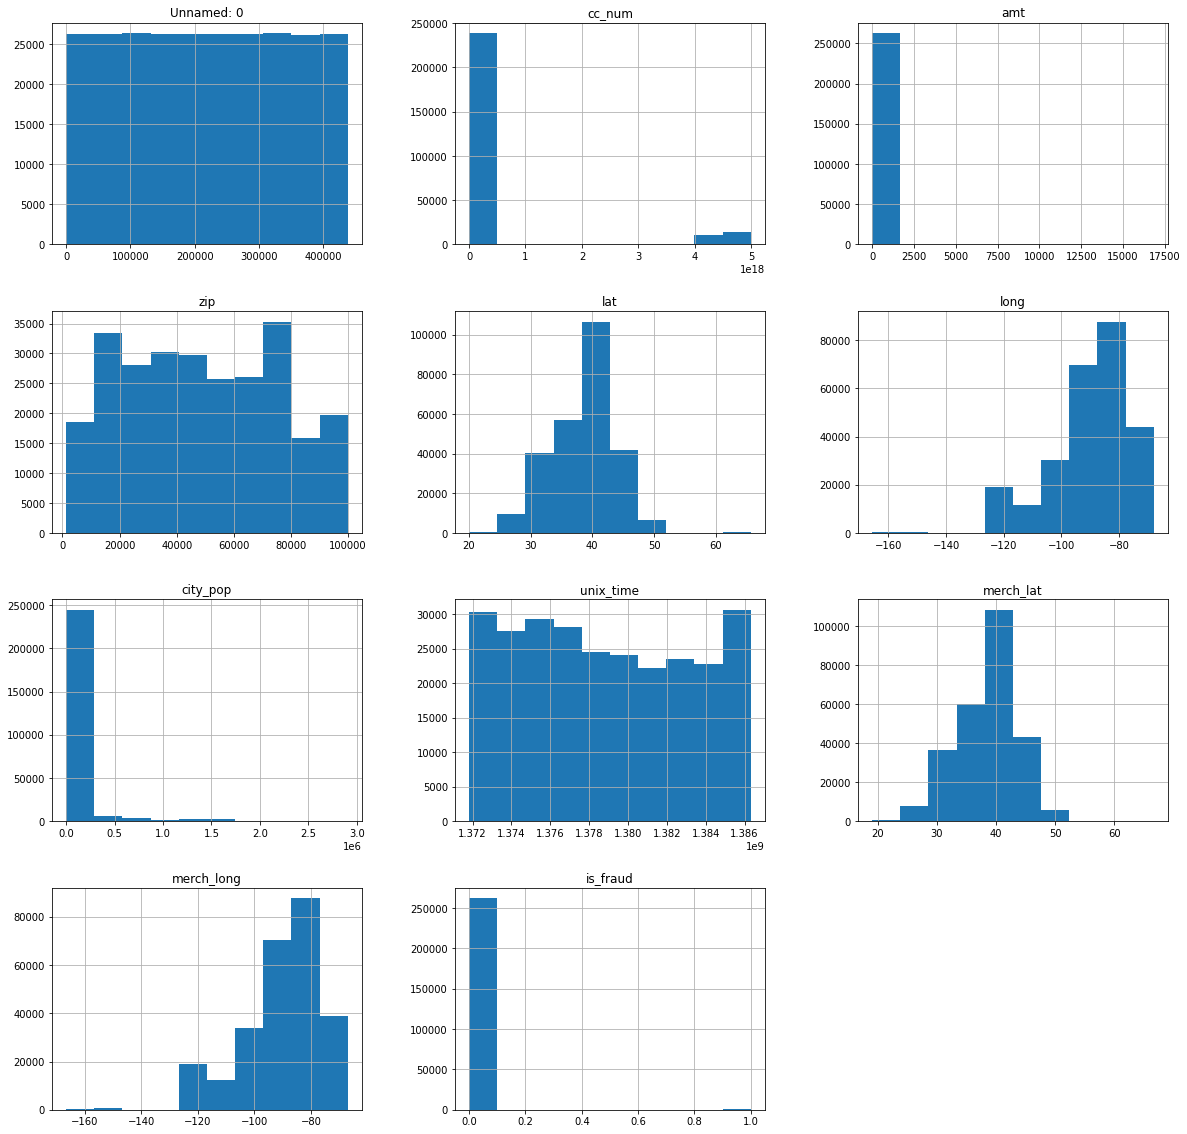

In [ ]:
# plot the histogram of each parameter
data_part.hist(figsize = (20, 20))
plt.show()

## Feature Explorations 

### Target Variable distribution studies 

In [ ]:
temp = data["is_fraud"].value_counts()
df = pd.DataFrame({'is_fraud': temp.index,'amt': temp.values})

trace = go.Bar(
    x = df['is_fraud'],y = df['amt'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df['amt']
)
data_fig = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'is_fraud', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data_fig, layout=layout)
iplot(fig, filename='class')

In [ ]:
# determine the number of fraud vs not fraud cases
fraud = data[data['is_fraud'] == 1]
valid = data[data['is_fraud'] == 0]

outlier_fraction = len(fraud) / float(len(valid))

# -----------------------
print('outlier_fraction : {}'.format(outlier_fraction))
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))


outlier_fraction : 0.004457866965692311
Fraud Cases: 1944
Valid Cases: 436083


### Explorations in Time : Fraud Vs Non Fraud 

In [ ]:
# Separate Time col for both the classes 
class_0 = data.loc[data['is_fraud'] == 0]["unix_time"]
class_1 = data.loc[data['is_fraud'] == 1]["unix_time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')# 

In [ ]:
import pandas as pd
from datetime import datetime

data['time'] = pd.to_datetime(data['unix_time'],unit='s') # Changing the values of the column 


In [ ]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,time
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2013-06-21 12:14:25
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2013-06-21 12:14:33
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2013-06-21 12:14:53
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2013-06-21 12:15:15
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2013-06-21 12:15:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438022,438022,2020-12-06 10:51:12,38295635583927,fraud_Cole PLC,grocery_pos,103.95,Candice,Brown,F,9412 Harris Mews,...,-99.8473,178,Warden/ranger,1983-06-14,01098b850a9cb825df1539290bbf1f30,1386327072,32.564689,-100.196288,0,2013-12-06 10:51:12
438023,438023,2020-12-06 10:51:39,4914700582394237,fraud_Bogisich Inc,grocery_pos,66.30,John,Williams,M,8929 Phillips Corners Suite 259,...,-80.1381,4589,Bookseller,1956-05-01,4b0ee6efd5927213d9be0590e6e40230,1386327099,40.299846,-79.836543,0,2013-12-06 10:51:39
438024,438024,2020-12-06 10:51:39,3587960728692500,fraud_Emard Inc,gas_transport,43.92,Kathy,Hughes,F,02110 Lucas Freeway Suite 517,...,-95.6045,1075,"Teacher, early years/pre",1997-01-02,1e3e31f24fc7eace04675041b73d57b4,1386327099,42.374396,-96.533738,0,2013-12-06 10:51:39
438025,438025,2020-12-06 10:51:55,180036456789979,fraud_Schmitt Inc,gas_transport,40.29,Mackenzie,Salazar,F,982 Melissa Lock,...,-91.0685,878,Risk analyst,1974-11-20,0807ff25566a2fb4763aaab9f758a1ec,1386327115,43.084161,-91.764143,0,2013-12-06 10:51:55


In [ ]:

data['Dates'] = pd.to_datetime(data['time']).dt.date
data['Time'] = pd.to_datetime(data['time']).dt.time

In [ ]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,time,Dates,Time
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2013-06-21 12:14:25,2013-06-21,12:14:25
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2013-06-21 12:14:33,2013-06-21,12:14:33
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2013-06-21 12:14:53,2013-06-21,12:14:53
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2013-06-21 12:15:15,2013-06-21,12:15:15
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2013-06-21 12:15:17,2013-06-21,12:15:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438022,438022,2020-12-06 10:51:12,38295635583927,fraud_Cole PLC,grocery_pos,103.95,Candice,Brown,F,9412 Harris Mews,...,Warden/ranger,1983-06-14,01098b850a9cb825df1539290bbf1f30,1386327072,32.564689,-100.196288,0,2013-12-06 10:51:12,2013-12-06,10:51:12
438023,438023,2020-12-06 10:51:39,4914700582394237,fraud_Bogisich Inc,grocery_pos,66.30,John,Williams,M,8929 Phillips Corners Suite 259,...,Bookseller,1956-05-01,4b0ee6efd5927213d9be0590e6e40230,1386327099,40.299846,-79.836543,0,2013-12-06 10:51:39,2013-12-06,10:51:39
438024,438024,2020-12-06 10:51:39,3587960728692500,fraud_Emard Inc,gas_transport,43.92,Kathy,Hughes,F,02110 Lucas Freeway Suite 517,...,"Teacher, early years/pre",1997-01-02,1e3e31f24fc7eace04675041b73d57b4,1386327099,42.374396,-96.533738,0,2013-12-06 10:51:39,2013-12-06,10:51:39
438025,438025,2020-12-06 10:51:55,180036456789979,fraud_Schmitt Inc,gas_transport,40.29,Mackenzie,Salazar,F,982 Melissa Lock,...,Risk analyst,1974-11-20,0807ff25566a2fb4763aaab9f758a1ec,1386327115,43.084161,-91.764143,0,2013-12-06 10:51:55,2013-12-06,10:51:55


In [ ]:
def hr_func(ts):
    return ts.hour

data['Hour'] = data['Time'].apply(hr_func)

In [ ]:

# Create a temp data frame With Hour ,is_fraud	
tmp = data.groupby(['Hour', 'is_fraud'])['amt'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'is_fraud', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()


,Hour,is_fraud,Min,Max,Transactions,Sum,Mean,Median,Var
0,0,0,1.00,1891.39,14247,1047526.46,73.526108,60.63,7393.717928
1,0,1,6.12,1115.75,171,59315.76,346.875789,301.37,100007.320680
2,1,0,1.00,3887.64,14382,1089262.07,75.737872,60.87,9922.482861
3,1,1,5.60,1116.06,157,60410.96,384.783185,315.72,97173.443042
4,2,0,1.00,3288.68,14233,1080715.71,75.930282,61.85,9487.896714


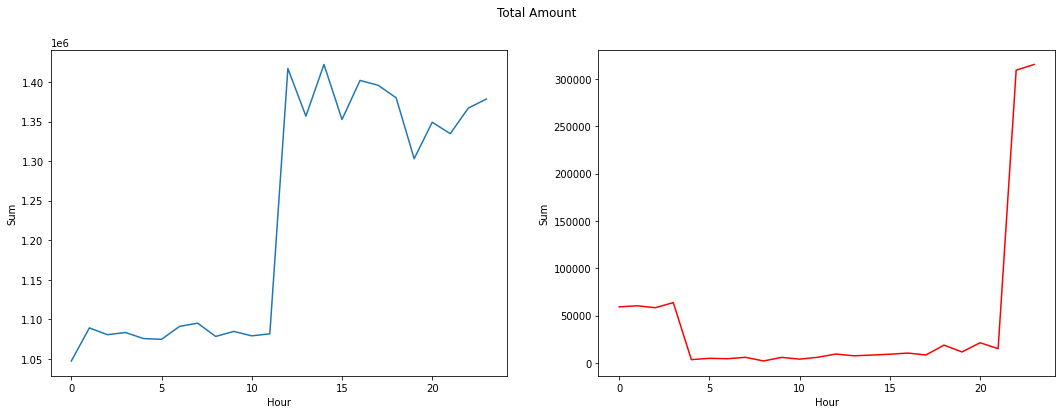

In [ ]:
# Plot Total  Tran Amount Vs Hour : For Normal and Fraud Transactions 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.is_fraud==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.is_fraud==1], color="red")
plt.suptitle("Total Amount")
plt.show();

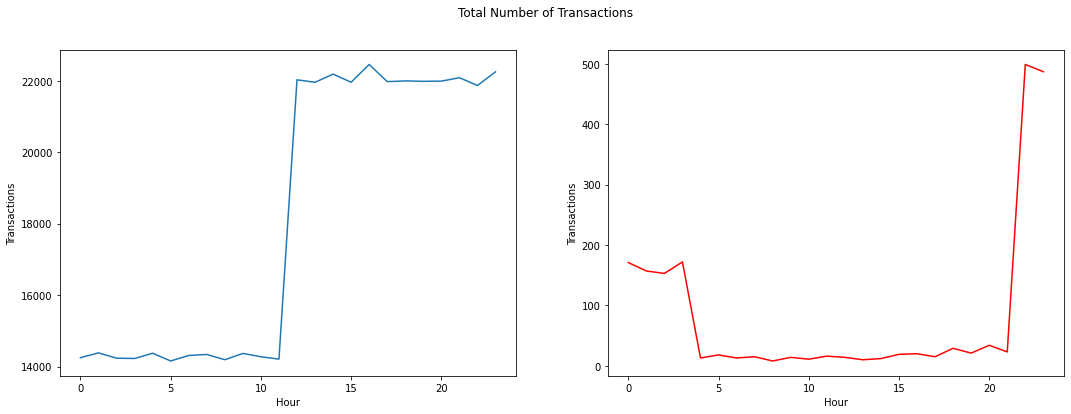

In [ ]:
# Plot Count for Transactions  Vs Hour : For Normal and Fraud Transactions 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.is_fraud==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.is_fraud==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

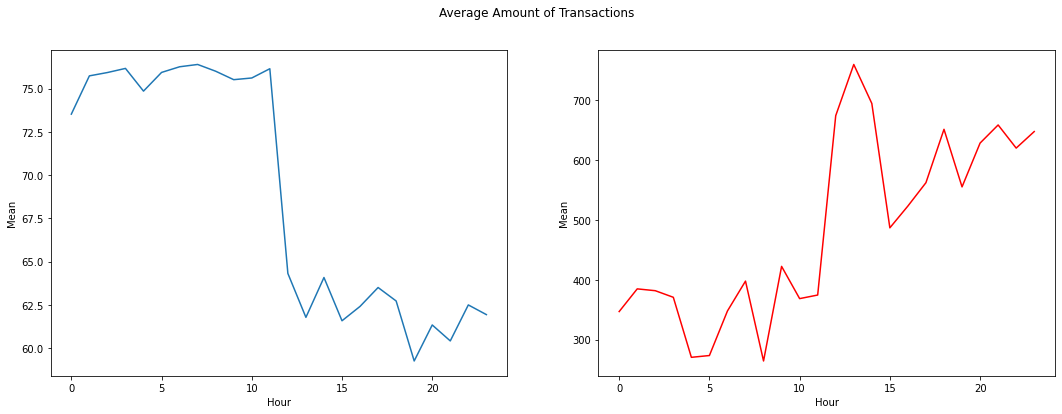

In [ ]:
# Plot Total  Avg  Amount Vs Hour : For Normal and Fraud Transactions 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.is_fraud==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.is_fraud==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();



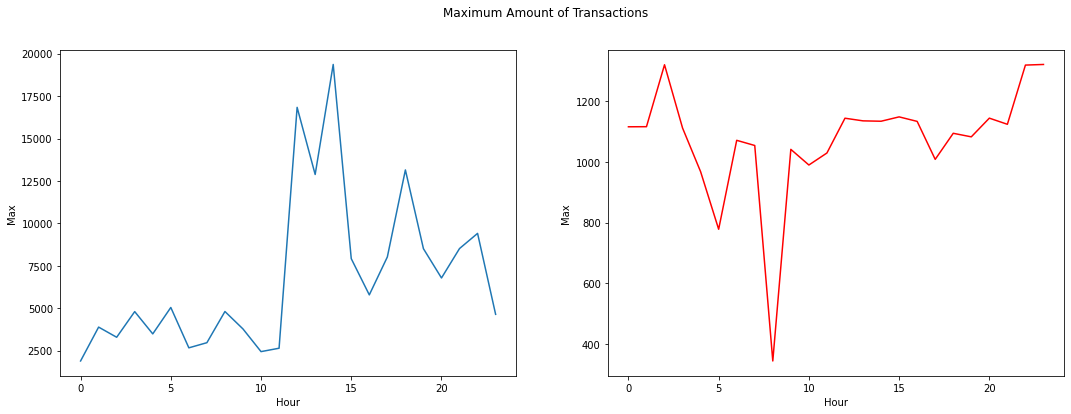

In [ ]:
# Plot Max Amt of Transactions vs Hour for good Transactions Vs Fraud ones 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.is_fraud==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.is_fraud==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();



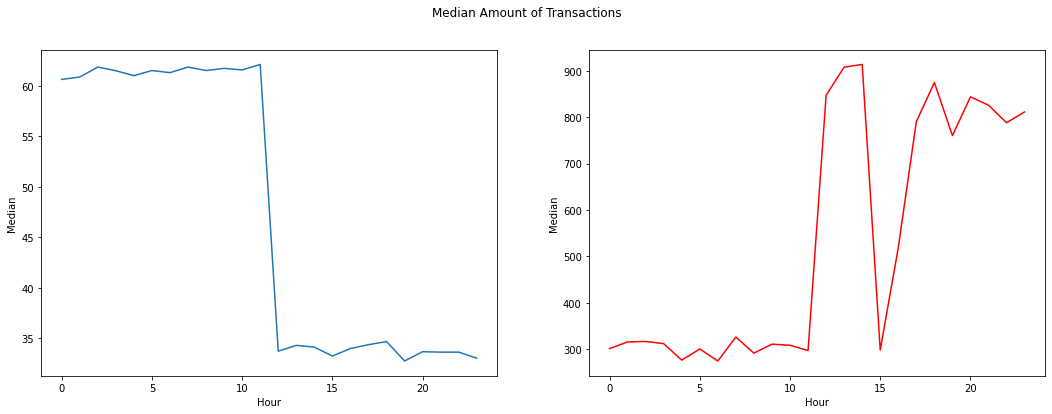

In [ ]:
# Plot Median Amt of Transactions vs Hour  

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.is_fraud==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.is_fraud==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

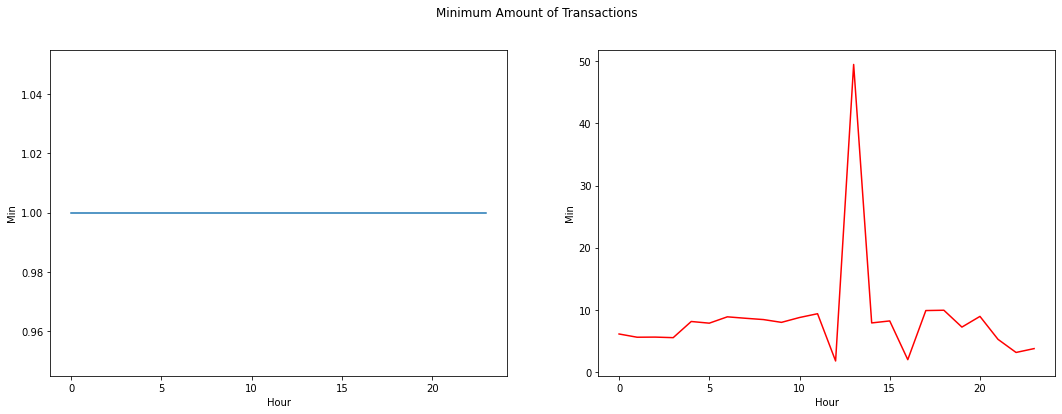

In [ ]:
# Plot Minimum Amt of Transactions vs Hour  

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.is_fraud==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.is_fraud==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

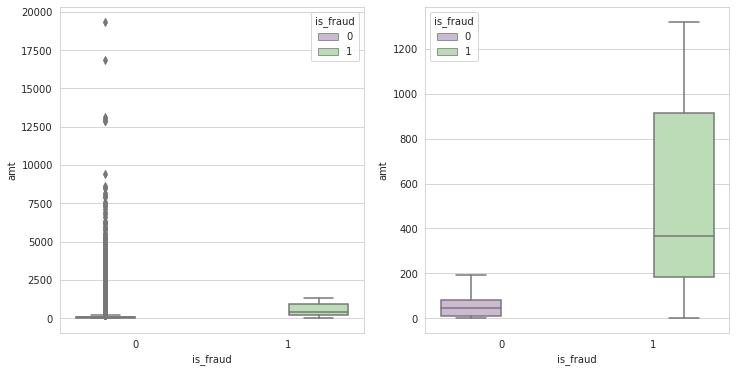

In [ ]:
# Box plots on Amount Vs class

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="is_fraud", y="amt", hue="is_fraud",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="is_fraud", y="amt", hue="is_fraud",data=data, palette="PRGn",showfliers=False)
plt.show();
